# Human Centered Computing in Mental Health
## By: Fardin Ahmed
## CS 4395 - Senior Project
## ======================================================

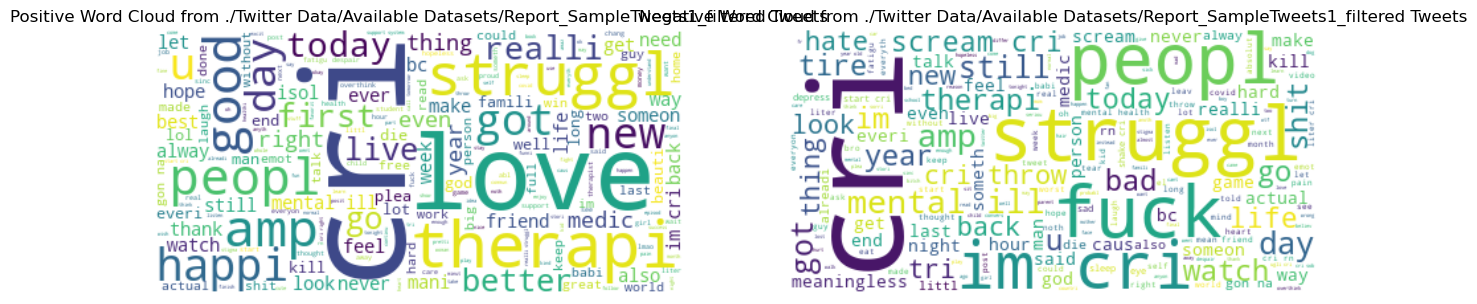

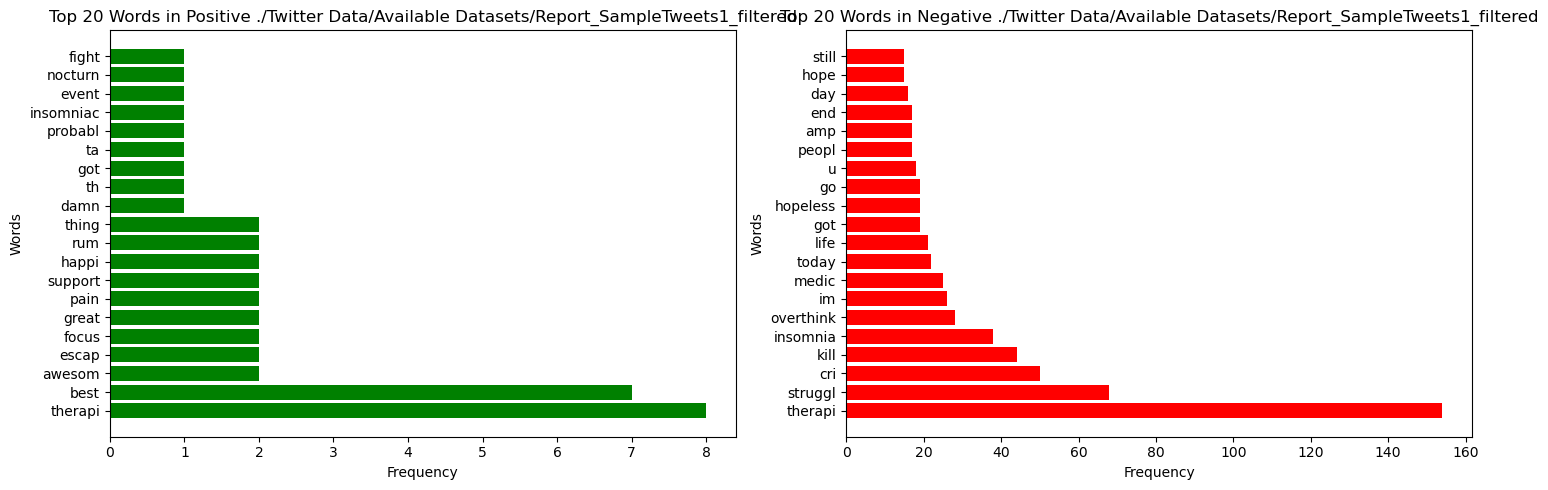

Naive Bayes Accuracy: 0.72
Naive Bayes Precision: 0.88
Naive Bayes Recall: 0.21
Naive Bayes F1-Score: 0.34
Naive Bayes Confusion Matrix:
TN: 411, FP: 6, FN: 167, TP: 44
Naive Bayes True Positive Rate (TPR): 0.21
Naive Bayes False Positive Rate (FPR): 0.01
Naive Bayes True Negative Rate (TNR): 0.99
Naive Bayes False Negative Rate (FNR): 0.79

SVM Accuracy: 0.79
SVM Precision: 0.88
SVM Recall: 0.45
SVM F1-Score: 0.60
SVM Confusion Matrix:
TN: 404, FP: 13, FN: 116, TP: 95
SVM True Positive Rate (TPR): 0.45
SVM False Positive Rate (FPR): 0.03
SVM True Negative Rate (TNR): 0.97
SVM False Negative Rate (FNR): 0.55

Logistic Regression Accuracy: 0.79
Logistic Regression Precision: 0.84
Logistic Regression Recall: 0.46
Logistic Regression F1-Score: 0.60
Logistic Regression Confusion Matrix:
TN: 399, FP: 18, FN: 113, TP: 98
Logistic Regression True Positive Rate (TPR): 0.46
Logistic Regression False Positive Rate (FPR): 0.04
Logistic Regression True Negative Rate (TNR): 0.96
Logistic Regression

KeyboardInterrupt: Interrupted by user

In [2]:
# Note: Please install and upgrade all libraries provided before running this program. Thank you.

# =====================================================================================================================
# Importing Libraries
#=====================================================================================================================

import emoji
import glob
import matplotlib
import matplotlib.pyplot as plt
import nltk
import numpy as np
import os
import pandas as pd
import re
import shutil
import string

from concurrent.futures import ThreadPoolExecutor
from IPython.display import clear_output
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import STOPWORDS
from wordcloud import WordCloud

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk_stopwords = set(stopwords.words('english'))
sia = SentimentIntensityAnalyzer()

#=====================================================================================================================
# Global variables - Directory
#=====================================================================================================================

def create_directory(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

# Global variables - Directory
folder_path = './Twitter Data'
target_folder = './Twitter Data/Filtered Tweets/'
filtered_folder = './Twitter Data/Filtered Tweets'
output_folder = './Twitter Data/Available Datasets/'
combined_folder = './Twitter Data/Combined/'
output_directory = "./Twitter Data/Categorized_dataset"

# Create directories if they don't exist
create_directory(folder_path)
create_directory(target_folder)
create_directory(filtered_folder)
create_directory(output_folder)
create_directory(combined_folder)
create_directory(output_directory)



#=====================================================================================================================
# Depressive categories and defining
#=====================================================================================================================

def define_categories(): 
    # Emotional State and Struggles
    emotional_state_phrases = [
        "struggling", "feeling worthless", "despair", "emotional pain", "numbness", "deep despair",
        "unbearable sadness", "constant emptiness", "uncontrollable emotions", "emotional exhaustion",
        "emotional struggle", "endless sadness", "endless emptiness", "living in darkness", "inner demons",
        "emotional numbness", "feeling overwhelmed", "coping with depression", "life feels meaningless",
        "dark thoughts", "mental anguish"
    ]

    # Self-Esteem and Self-Image
    self_esteem_phrases = [
        "self-worth", "self-loathing", "self-hatred", "constant self-doubt", "self-destructive",
        "empty inside", "worthlessness", "meaningless", "feel like a failure", "no purpose"
    ]

    # Isolation and Withdrawal
    isolation_phrases = [
        "self-isolation", "feeling like giving up", "feeling trapped", "rock bottom", "asking for help",
        "seeking isolation", "social withdrawal"
    ]

    # Suicidal Thoughts and Self-Harm
    suicidal_self_harm_phrases = [
        "suicidal thoughts", "self-harm", "end it all", "kill myself", "end my life", "suicide attempt", "hurt myself", 
        "want to die", "ending my life", "cutting myself", "killing myself"
    ]

    # Treatment and Coping
    treatment_phrases = [
        "therapy", "therapy progress", "therapy appointment", "medication adjustment", "treatment options",
        "reaching out for help"
    ]

    # Physical and Behavioral Symptoms
    physical_behavioral_phrases = [
        "crying", "isolated", "can't get out of bed", "sleep problems", "fatigue", "weight changes",
        "insomnia", "loss of appetite", "constant fatigue"
    ]

    # Relationships and Social Stigma
    relationships_stigma_phrases = [
        "feeling judged", "support system", "feeling disconnected", "hiding my pain", "seeking solace",
        "constant battle with my mind", "feeling judged"
    ]

    # Negative Thoughts
    negative_thoughts_phrases = [
        "persistent negative thoughts", "mind racing", "overthinking", "mind in chaos", "can't concentrate",
        "I'm so tired", "low self-esteem", "difficulty concentrating", "loss of enjoyment", "irritability"
    ]

    # Hopelessness and Desperation
    hopelessness_phrases = [
        "feeling like a burden", "mental health struggles", "hopeless", "lost all hope"
    ]

    # Mental Health Awareness and Seeking Help
    mental_health_support_phrases = [
        "mental health awareness", "seeking help", "medication", "treatment options", "reaching out for help",
        "therapy session", "stigma", "mental illness", "supportive friends"
    ]
    
    categories = {
        "Emotional State and Struggles": emotional_state_phrases,
        "Self-Esteem and Self-Image": self_esteem_phrases,
        "Isolation and Withdrawal": isolation_phrases,
        "Suicidal Thoughts and Self-Harm": suicidal_self_harm_phrases,
        "Treatment and Coping": treatment_phrases,
        "Physical and Behavioral Symptoms": physical_behavioral_phrases,
        "Relationships and Social Stigma": relationships_stigma_phrases,
        "Negative Thoughts": negative_thoughts_phrases,
        "Hopelessness and Desperation": hopelessness_phrases,
        "Mental Health Awareness and Seeking Help": mental_health_support_phrases
    }
    return categories



#=====================================================================================================================
# Preprocessing
#=====================================================================================================================

# Custom pronouns, function words, and simple verbs as additional stopwords
custom_pronouns = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 
                   'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 
                   'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 
                   'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 
                   'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 
                   'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 
                   'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 
                   'over', 'under', 'again', 'further', 'then', 'once', 'one', 'dont', 'time', 'ive', 'much',
                   'want', 'like', 'get', 'would', 'make', 'take', 'see', 'say', 'think', 'come', 'go', 'know', 'tell', 
                   'ask', 'work', 'seem', 'try', 'call', 'need', 'use', 'find', 'give', 'show', 'hear', 'play', 'run', 
                   'move', 'help', 'start', 'stop', 'write', 'be', 'become', 'begin', 'feel', 'bring', 'buy', 'put']


# Merge the lists and remove duplicates
combined_stopwords = list(set(custom_pronouns))

# Initialize the Porter Stemmer, WordNet Lemmatizer
porter = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Set of stopwords
stopwords = set(nltk.corpus.stopwords.words('english'))

# Text cleaning function with stemming, lemmatization, and removal of stopwords
def clean_text(text):
    if combined_stopwords is not None:
        stopwords.update(combined_stopwords)
    
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove non-alphabetic characters
    text = text.lower()  # Convert to lowercase

    # Tokenize into words using nltk's word_tokenize
    words = word_tokenize(text)
    
    # Remove stopwords, apply stemming, and lemmatization
    processed_words = [lemmatizer.lemmatize(porter.stem(word)) for word in words if word.lower() not in stopwords]

    # Join the processed words back into cleaned text
    cleaned_text = ' '.join(processed_words)

    return cleaned_text



#=====================================================================================================================
# Additional Preprocessing
#=====================================================================================================================

def define_depressive_stop_words():
    depressive_stop_words = [
        "adjustment", "all", "anguish", "appetite", "appointment", "asking", "attempt", "awareness", "battle", 
        "bed", "bottom", "burden", "can", "changes", "chaos", "concentrate", "concentrating", "constant", 
        "coping", "cutting", "dark", "darkness", "deep", "demons", "depression", "destructive", "die", "difficulty", 
        "disconnected", "doubt", "emotional", "emotions", "emptiness", "empty", "end", "ending", "endless", 
        "enjoyment", "esteem", "exhaustion", "failure", "feel", "feeling", "feels", "for", "friends", "get", 
        "giving", "harm", "hatred", "health", "help", "hiding", "hope", "hurt", "illness", "in", "inner", "inside", 
        "isolation", "it", "judged", "kill", "killing", "life", "like", "living", "loathing", "loss", "lost", "low", 
        "mental", "mind", "my", "myself", "negative", "no", "of", "options", "out", "overwhelmed", "pain", "persistent", 
        "problems", "progress", "purpose", "racing", "reaching", "rock", "sadness", "seeking", "self", "session", "sleep", 
        "so", "social", "solace", "struggle", "struggles", "suicidal", "suicide", "support", "supportive", "system", "thoughts", 
        "tired", "to", "trapped", "treatment", "unbearable", "uncontrollable", "up", "want", "weight", "with", "withdrawal", 
        "worth", "worthless",
        
        "n't", "'m", "'s"
    ]
    return depressive_stop_words



#=====================================================================================================================
# Title Screen
#=====================================================================================================================

def display_title_screen():
    print("=" * 50)
    print("Human Centered Computing in Mental Health:")
    print("Twitter Sentiment Analysis\n")
    print("Created by: Fardin Ahmed")
    print("CS 4395 - Senior Project")
    print("University of Houston Downtown - 2023")
    print("=" * 50)
    print()
    input("Press Enter to continue...")
    

    
#=====================================================================================================================
# Listing, checking, and comparing available datasets (Raw and filtered)
#=====================================================================================================================

def list_available_datasets(folder_path):
    # Get a list of dataset files in the folder with a .csv extension
    dataset_files = glob.glob(os.path.join(folder_path, '*.csv'))

    # Create a folder to store the Notepad file
    output_folder = './Twitter Data/Available Datasets/'
    os.makedirs(output_folder, exist_ok=True)

    # Write the available dataset names to a Notepad file in the output folder
    notepad_filename = 'available_datasets.txt'
    notepad_filepath = os.path.join(output_folder, notepad_filename)

    # Prepare the list of available datasets
    available_datasets = []

    for dataset_file in dataset_files:
        dataset_name = os.path.splitext(os.path.basename(dataset_file))[0]
        available_datasets.append(dataset_name)

    # Write the available dataset names to the Notepad file
    with open(notepad_filepath, 'w') as notepad_file:
        notepad_file.write('\n'.join(available_datasets))

    # Return the list of available datasets (if needed)
    return available_datasets

def list_available_filtered_datasets(filtered_folder, output_folder):
    # Get a list of dataset files in the folder
    dataset_files = glob.glob(os.path.join(filtered_folder, '*.csv'))

    # Create a folder to store the Notepad file
    os.makedirs(output_folder, exist_ok=True)

    # Write the available dataset names to a Notepad file in the output folder
    notepad_filename = 'filtered_tweets_records.txt'
    notepad_filepath = os.path.join(output_folder, notepad_filename)
    with open(notepad_filepath, 'w') as notepad_file:
        available_datasets = []
        for i, dataset_file in enumerate(dataset_files, start=1):
            dataset_name = os.path.splitext(os.path.basename(dataset_file))[0]
            available_datasets.append(dataset_name)
        notepad_file.write('\n'.join(available_datasets))
        
def check_missing_dataset_names(file1_path, file2_path):
    try:
        # Read the dataset names from both text files
        with open(file1_path, 'r') as file1:
            available_datasets = set(line.strip() for line in file1)

        with open(file2_path, 'r') as file2:
            # Remove "_filtered" from the dataset names in file2
            filtered_datasets = set(line.strip()[:-9] for line in file2)

        # Find dataset names in file1 that are not in file2
        missing_datasets = available_datasets - filtered_datasets

        return missing_datasets
    except FileNotFoundError:
        print("Error: One or both of the required text files not found.")
        return set()
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return set()

    

    
#=====================================================================================================================
# Loading and Selecting the dataset with analysis on which csv column contains tweets
#=====================================================================================================================
            
def load_dataset(dataset_path):
    # Debug print to verify dataset path
    print(f"Loading dataset from: {dataset_path}")

    # Load the CSV file into a DataFrame
    try:
        df = pd.read_csv(dataset_path, encoding='utf-8')
        return df
    except FileNotFoundError:
        print(f"File not found: {dataset_path}")
        return None

def select_dataset(folder_path):
    # List available datasets in the folder
    available_datasets = list_available_datasets(folder_path)

    # Check if there are any available datasets
    if not available_datasets:
        print("No datasets found in the folder.")
        return None, None, None

    # Display the list of available datasets
    print("Available datasets in the folder:")
    for i, dataset in enumerate(available_datasets, start=1):
        print(f"{i}. {dataset}")

    while True:
        # Get the user's choice
        dataset_choice = input("Enter the number of the dataset you want to select: ")

        try:
            dataset_choice = int(dataset_choice)
            if 1 <= dataset_choice <= len(available_datasets):
                dataset_name = available_datasets[dataset_choice - 1]
                dataset_path = os.path.join(folder_path, f"{dataset_name}.csv")
                clear_output()

                # Debug print to verify dataset path
                print(f"Dataset path: {dataset_path}")

                # Load the selected dataset into a DataFrame
                df = load_dataset(dataset_path)

                # Detect the likely tweet column
                likely_tweet_column = detect_likely_tweet_column(df)

                if likely_tweet_column:
                    print(f"Likely tweet column: {likely_tweet_column}")
                    print("Dataset loaded successfully.")
                    print("-" * 50)
                    return df, dataset_name, likely_tweet_column
                else:
                    print("No likely tweet column detected in the dataset.")
                    return None, None, None

            else:
                print("Invalid choice. Please enter a valid number.")
                continue

        except ValueError:
            print("Invalid input. Please enter a valid number.")
            continue
    
def detect_likely_tweet_column(df):
    # Create a dictionary to store the criteria for each likely tweet column
    likely_tweet_columns = {}

    # Iterate through the likely tweet columns
    for column in df.columns:
        print(f"Analyzing column: {column}")
        if not column.startswith("https://"):
            # Calculate the average length of text
            average_length = df[column].apply(lambda x: len(str(x))).mean()
            
            # Calculate the percentage of non-empty values
            non_empty_percentage = (df[column].apply(lambda x: isinstance(x, str) and len(str(x).strip()) > 0).sum() / len(df)) * 100
            
            # Calculate the percentage of unique values
            unique_percentage = (len(set(df[column])) / len(df)) * 100
            
            likely_tweet_columns[column] = {
                'average_length': average_length,
                'non_empty_percentage': non_empty_percentage,
                'unique_percentage': unique_percentage
            }

    # Determine the most likely tweet column based on criteria
    if likely_tweet_columns:
        weights = {
            'average_length': 1,
            'non_empty_percentage': 2,
            'unique_percentage': 3
        }

        # Calculate a score for each column based on the weighted criteria
        for column, criteria in likely_tweet_columns.items():
            score = sum(weights[criterion] * criteria[criterion] for criterion in criteria)
            likely_tweet_columns[column]['score'] = score

        # Find the column with the highest score
        most_likely_tweet_column = max(likely_tweet_columns, key=lambda x: likely_tweet_columns[x]['score'])

        # Return the most likely tweet column
        return most_likely_tweet_column

    else:
        return None


    
    
#=====================================================================================================================
# Option panel to see raw tweets or filtered tweets with saving to a filtered csv file and combining
#=====================================================================================================================

def choose_operation(df, likely_tweet_column, dataset_name, target_folder, categories):
    filtered_tweets_saved = False
    
    while True:
        # Get the user's choice
        choice = input("What would you like to do?\n1. See all tweets\n2. See only filtered tweets\n3. Return to main menu\n")

        if choice == '1':
            clear_output()
            print("I'm fetching all the tweets. This could take a while")
            print("=" * 50)
            
            # Pass the likely_tweet_column to print_rows_with_column function
            print_rows_with_column(df, likely_tweet_column)

        elif choice == '2':
            clear_output()
            print("Analyzing and displaying filtered tweets...")
            print("-" * 50)

            # Apply the classification and sentiment analysis function to each tweet in the specified column
            df[['Tweet', 'Sentiment', 'Classified Categories']] = df[likely_tweet_column].apply(lambda x: classify_and_analyze(x, categories)).apply(pd.Series)

            # Filter the DataFrame to include only rows with classified categories
            filtered_df = df[df['Classified Categories'].apply(lambda x: len(x) > 0) | df['Classified Categories'].isnull()]

            # Sort the filtered DataFrame by sentiment score in ascending order
            filtered_df = filtered_df.sort_values(by='Sentiment', ascending=True)

            # Display the results
            for index, row in filtered_df.iterrows():
                print(f"Tweet {index + 1}:")
                print(row['Tweet'])
                print()
                print(f"Sentiment Score: {row['Sentiment']:.2f}")
                print("Classified Categories:", ', '.join(row['Classified Categories']))
                print("-" * 50)
            
            save_filtered_tweets_to_csv(filtered_df, dataset_name, target_folder)
            combine_and_save_filtered_datasets(filtered_folder, combined_folder)

        elif choice == '3':
            clear_output()
            return
        else:
            print("Invalid choice. Please enter a valid number (1, 2, or 3).")

            
            
#=====================================================================================================================
# Printing rows and columns from either individual datasets or the combined dataset
#=====================================================================================================================
            
def print_rows_with_column(df, column):
    if column in df.columns:
        # Iterate through the DataFrame and print individual rows with the specified column
        for index, row in df.iterrows():
            if column in row:
                long_text = row[column]
                print(f"Row {index + 1}: ")
                print(long_text)
                print("-" * 50)
        if not any(column in row for _, row in df.iterrows()):
            print("No rows found for the specified column.")
    else:
        print(f"The '{column}' column is not found in the DataFrame.")    


        
#=====================================================================================================================
# Data Processing
#=====================================================================================================================
        
def classify_and_analyze(tweet, categories):
    tweet = str(tweet).lower()  # Ensure tweet is a string and convert to lowercase
    sentiment = TextBlob(tweet).sentiment.polarity
    classifications = []

    # Classify the tweet into categories
    for category, phrases in categories.items():
        if any(phrase.lower() in tweet for phrase in phrases):
            classifications.append(category)

    return tweet, sentiment, classifications 

def save_filtered_tweets_to_csv(filtered_df, dataset_name, target_folder):
    # Specify the path and filename for the CSV file to save the results
    csv_filename = f'{dataset_name}_filtered.csv'

    # Check if the CSV file already exists
    try:
        existing_df = pd.read_csv(csv_filename)

        # Combine the existing data with the new data and remove duplicates based on the 'Tweet' column
        combined_df = pd.concat([existing_df, filtered_df[['Tweet', 'Classified Categories', 'Sentiment']]], ignore_index=True)
        combined_df.drop_duplicates(subset='Tweet', inplace=True)

        # Save the combined DataFrame back to the CSV file
        combined_df.to_csv(csv_filename, columns=['Tweet', 'Classified Categories', 'Sentiment'], index=False)

        # Move the CSV file to the target folder
        shutil.move(csv_filename, os.path.join(target_folder, csv_filename))

        print(f"Filtered tweets appended to '{csv_filename}'")

    except FileNotFoundError:
        # If the file does not exist, simply save the filtered data to a new CSV file
        filtered_df[['Tweet', 'Classified Categories', 'Sentiment']].to_csv(csv_filename, index=False)

        # Move the CSV file to the target folder
        shutil.move(csv_filename, os.path.join(target_folder, csv_filename))

        print(f"Filtered tweets saved to '{csv_filename}'")

def combine_and_save_filtered_datasets(filtered_folder, combined_folder):
    # Get a list of all the _filtered.csv files in the folder
    filtered_files = glob.glob(os.path.join(filtered_folder, '*_filtered.csv'))

    # Initialize an empty DataFrame to store the combined data
    combined_data = pd.DataFrame()

    # Loop through each _filtered.csv file and append it to the combined_data DataFrame
    for file in filtered_files:
        try:
            df = pd.read_csv(file)
            combined_data = pd.concat([combined_data, df], ignore_index=True)
        except pd.errors.EmptyDataError:
            pass  # Skip empty files if any

    # Remove duplicates based on the 'Tweet' column
    combined_data.drop_duplicates(subset='Tweet', inplace=True)

    # Specify the target folder to save the combined dataset
    os.makedirs(combined_folder, exist_ok=True)

    # Specify the filename for the combined dataset
    combined_filename = 'combined_filtered_tweets.csv'

    # Create the full path for the combined dataset
    combined_filepath = os.path.join(combined_folder, combined_filename)

    # Save the combined data to the specified location
    combined_data.to_csv(combined_filepath, columns=['Tweet', 'Classified Categories', 'Sentiment'], index=False)

    print(f"Now combined to '{combined_filepath}'")

def filter_and_combine_datasets(folder_path, filtered_folder, combined_folder, categories):
    # Get a list of all the CSV files in the dataset folder
    dataset_files = glob.glob(os.path.join(folder_path, '*.csv'))

    # Initialize an empty DataFrame to store the combined data
    combined_data = pd.DataFrame()

  
    # Loop through each CSV file and process it
    for dataset_file in dataset_files:
        dataset_name = os.path.splitext(os.path.basename(dataset_file))[0]
        filtered_filename = os.path.join(filtered_folder, f"{dataset_name}_filtered.csv")

        # Check if the filtered dataset already exists
        if os.path.exists(filtered_filename):
            print(f"Filtered dataset for '{dataset_name}' already exists. Skipping filtering.")
        else:
            print(f"Filtering dataset '{dataset_name}'...")
            try:
                df = pd.read_csv(dataset_file)

                # Detect the likely tweet column
                likely_tweet_column = detect_likely_tweet_column(df)

                if likely_tweet_column:
                    # Proceed with the existing code using the likely tweet column
                    df[['Tweet', 'Sentiment', 'Classified Categories']] = df[likely_tweet_column].apply(lambda x: classify_and_analyze(x, categories)).apply(pd.Series)

                    # Filter the DataFrame to include only rows with classified categories
                    filtered_df = df[df['Classified Categories'].apply(lambda x: len(x) > 0) | df['Classified Categories'].isnull()]

                    # Save the filtered data to its own CSV file
                    filtered_df[['Tweet', 'Classified Categories', 'Sentiment']].to_csv(filtered_filename, index=False)

                    print(f"Filtered dataset for '{dataset_name}' saved to '{filtered_filename}'")
                else:
                    print(f"No likely tweet column detected in the dataset. Skipping '{dataset_name}'")

            except pd.errors.EmptyDataError:
                print(f"Skipping empty dataset: '{dataset_name}'")

        # Load the filtered dataset and append it to the combined_data DataFrame
        try:
            filtered_df = pd.read_csv(filtered_filename)
            combined_data = pd.concat([combined_data, filtered_df], ignore_index=True)
        except FileNotFoundError:
            pass

    # Remove duplicates based on the 'Tweet' column
    combined_data.drop_duplicates(subset='Tweet', inplace=True)

    # Specify the target folder to save the combined dataset
    os.makedirs(combined_folder, exist_ok=True)

    # Specify the filename for the combined dataset
    combined_filename = 'combined_filtered_tweets.csv'

    # Create the full path for the combined dataset
    combined_filepath = os.path.join(combined_folder, combined_filename)

    # Save the combined data to the specified location
    combined_data.to_csv(combined_filepath, columns=['Tweet', 'Classified Categories', 'Sentiment'], index=False)

    print(f"Combined datasets saved to '{combined_filepath}'")
    
#=====================================================================================================================
# Individual Dataset Analysis
#=====================================================================================================================
    
def select_dataset_from_folder(folder_path):
    # List all files in the folder
    files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

    if not files:
        print(f"No datasets found in the folder: {folder_path}")
        return None

    # Display the available datasets
    print("Available datasets:")
    for i, file in enumerate(files, start=1):
        print(f"{i}. {file}")

    # Get user input for the dataset choice
    while True:
        try:
            choice = int(input("Enter the number of the dataset you want to select: "))
            if 1 <= choice <= len(files):
                selected_dataset = files[choice - 1]
                clear_output()
                print(f"You have selected: {selected_dataset}")
                return selected_dataset
            else:
                print("Invalid choice. Please enter a valid number.")
        except ValueError:
            print("Invalid input. Please enter a number.")
    
def analyze_individual_dataset(filtered_folder):
    filtered_folder = './Twitter Data/Filtered Tweets'
    selected_dataset = select_dataset_from_folder(filtered_folder)
    clear_output()

    if selected_dataset:
        dataset_path = os.path.join(filtered_folder, selected_dataset)

        # Generate a full report for the selected dataset
        report_name = f"Report_{os.path.splitext(os.path.basename(selected_dataset))[0]}"
        report_path = os.path.join(output_folder, report_name)
        generate_report(dataset_path, report_path)
        print()

    else:
        print("No dataset selected. Exiting analysis.")
    
#=====================================================================================================================
# Combined Data Split and Data Analysis
#=====================================================================================================================
    
def split_combined_dataset(combined_folder, output_dir):
    # Load the combined dataset
    df = pd.read_csv(combined_folder)

    # Create the output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Initialize a dictionary to store datasets by category
    category_datasets = {}

    # Iterate through the rows of the combined dataset
    for index, row in df.iterrows():
        categories = row['Classified Categories']
        tweet_text = row['Tweet']
        sentiment_score = row['Sentiment']

        # Split the multiple categories
        for category in categories.split(', '):
            # Stripping any '[' and ']' characters from the category name
            category = category.strip('[]')

            # Create a new DataFrame for the current category
            category_df = pd.DataFrame({'Tweet': [tweet_text], 'Classified Categories': [category], 'Sentiment': [sentiment_score]})

            # Define the path to save the dataset for the current category
            category_output_path = os.path.join(output_dir, f"{category}_dataset.csv")

            # If the file already exists in the dictionary, append to it
            if category_output_path in category_datasets:
                category_datasets[category_output_path] = pd.concat([category_datasets[category_output_path], category_df], ignore_index=True)
            else:
                category_datasets[category_output_path] = category_df

    # Save each dataset to the corresponding file
    for category_output_path, category_df in category_datasets.items():
        category_df.to_csv(category_output_path, index=False)
    
def analyze_combined_dataset(combined_folder):
    # Manually assigning the folder to bypass permission issues
    combined_folder = "./Twitter Data/Combined/combined_filtered_tweets.csv"
    
    # Splitting the combined Datasets into Categorized Dataset
    print("Updating dataset. Please wait a moment.")
    split_combined_dataset(combined_folder, output_directory)
    clear_output()

    # Load the combined dataset
    combined_df = pd.read_csv(combined_folder)

    while True:
        print("What would you like to do?")
        print("1. Analyze the combined dataset")
        print("2. Analyze a specific categorized dataset")
        print("3. Exit to main menu")
        choice = input("Enter the number of your choice: ")

        if choice == "1":
            clear_output()
            
            # Function to analyze the combined dataset
            analyze_combined(combined_folder)
        elif choice == "2":
            clear_output()
            categorized_datasets = [file for file in os.listdir("./Twitter Data/Categorized_dataset") if file.endswith('.csv')]
            print("Available categorized datasets:")
            for i, dataset in enumerate(categorized_datasets, 1):
                print(f"{i}. {dataset}")

            dataset_choice = int(input("Enter the number of the dataset you want to analyze: ")) - 1

            if 0 <= dataset_choice < len(categorized_datasets):
                dataset_path = os.path.join("./Twitter Data/Categorized_dataset", categorized_datasets[dataset_choice])
                categorized_df = pd.read_csv(dataset_path)
                clear_output()
                print(f"Analyzing dataset: {categorized_datasets[dataset_choice]}")
                print()

                while True:
                    print("What would you like to do with the selected dataset?")
                    print("1. Read all tweets")
                    print("2. Generate Report")                    
                    print("3. Go back to the main menu")
                    analysis_option = input("Enter the number of your choice: ")

                    if analysis_option == "1":
                        clear_output()
                        read_all_tweets(dataset_path)
                    elif analysis_option == "2":
                        clear_output()
                        generate_report(dataset_path, dataset.replace('.csv', ''))
                    elif analysis_option == "3":
                        clear_output()
                        break
                    else:
                        print("Invalid choice. Please enter a valid number (1, 2, or 3).")
            else:
                print("Invalid choice.")
        elif choice == "3":
            break
        else:
            print("Invalid choice. Please enter a valid number (1, 2, or 3).")

def analyze_combined(combined_folder):
    combined_folder = "./Twitter Data/Combined/combined_filtered_tweets.csv"

    # Load the combined dataset
    combined_df = pd.read_csv(combined_folder)

    while True:
        print("What would you like to do?")
        print("1. Read all overall tweets")
        print("2. Generate Report for both combined and separate datasets")
        print("3. Go back to the main menu")
        choice = input("Enter the number of your choice: ")

        if choice == "1":
            clear_output()
            
            # Read all tweets from the combined dataset
            read_all_tweets(combined_folder)
        elif choice == "2":
            clear_output()
            
            # Generate the full report
            generate_report(combined_folder, "Combined Dataset")
            categorized_datasets = [file for file in os.listdir("./Twitter Data/Categorized_dataset") if file.endswith('.csv')]
            for dataset in categorized_datasets:
                dataset_path = os.path.join("./Twitter Data/Categorized_dataset", dataset)
                generate_report(dataset_path, dataset.replace('.csv', ''))
        elif choice == "3":
            break
        else:
            print("Invalid choice. Please enter a valid number (1, 2, or 3).")

        

#=====================================================================================================================
# Visualization of all tweets
#=====================================================================================================================           

# Function to read all tweets in a dataset
def read_all_tweets(dataset_path):
    df = pd.read_csv(dataset_path)
    
    for index, row in df.iterrows():
        tweet = row['Tweet']
        sentiment_score = row['Sentiment']

        print(f"Row {index + 1}: ")
        print(f"Tweet: {tweet}")
        print(f"Sentiment Score: {sentiment_score}")
        print("-" * 50)

#=====================================================================================================================
# Visualization using Wordcloud and Bar Chart
#=====================================================================================================================         

def display_wordclouds(df, dataset_name):
    # Separate positive and negative tweets based on sentiment score
    positive_tweets = df[df['Sentiment'] > 0]
    negative_tweets = df[df['Sentiment'] < 0]

    # All cleaned positive and negative tweets into single strings
    positive_tweets_text = ' '.join(positive_tweets['Cleaned_Text'].tolist())
    negative_tweets_text = ' '.join(negative_tweets['Cleaned_Text'].tolist())

    # Getting NLTK English stopwords
    stopwords = set(nltk.corpus.stopwords.words('english'))

    # Generate the word clouds for positive and negative tweets
    positive_wordcloud = WordCloud(width=400, height=200, background_color='white', stopwords=stopwords).generate(
        positive_tweets_text)
    negative_wordcloud = WordCloud(width=400, height=200, background_color='white', stopwords=stopwords).generate(
        negative_tweets_text)

    # Display word clouds side by side
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(positive_wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Positive Word Cloud from {dataset_name} Tweets')

    plt.subplot(1, 2, 2)
    plt.imshow(negative_wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Negative Word Cloud from {dataset_name} Tweets')

    plt.show()

def display_top_words_bar_chart(df, dataset_name):
    # Separate positive and negative tweets based on binary sentiment labels
    positive_tweets = df[df['Sentiment'] == 1]
    negative_tweets = df[df['Sentiment'] == 0]

    # Concatenate all cleaned positive and negative tweets into single strings
    positive_tweets_text = ' '.join(positive_tweets['Cleaned_Text'].tolist())
    negative_tweets_text = ' '.join(negative_tweets['Cleaned_Text'].tolist())

    # Remove stopwords and custom pronouns from positive and negative tweets
    stopwords = set(nltk.corpus.stopwords.words('english'))
    positive_words = [word for word in nltk.word_tokenize(positive_tweets_text) if word.lower() not in stopwords]

    # If there are no positive words, there will be neutral words
    if not positive_words:
        all_words = nltk.word_tokenize(' '.join(df['Cleaned_Text'].tolist()))
        neutral_words = [word for word in all_words if word.lower() not in stopwords]
        positive_words = neutral_words

    # Create frequency distribution for positive (or neutral) tweets
    positive_freq_dist = nltk.FreqDist(positive_words)
    top_positive_words = sorted(positive_freq_dist.items(), key=lambda x: x[1], reverse=True)[:20]
    positive_words, positive_counts = zip(*top_positive_words)

    # Remove stopwords and custom pronouns from negative tweets
    negative_words = [word for word in nltk.word_tokenize(negative_tweets_text) if word.lower() not in stopwords]

    # If there are no negative words, there will be neutral words
    if not negative_words: 
        negative_words = neutral_words

    # Create frequency distribution for negative tweets
    negative_freq_dist = nltk.FreqDist(negative_words)
    top_negative_words = sorted(negative_freq_dist.items(), key=lambda x: x[1], reverse=True)[:20]
    negative_words, negative_counts = zip(*top_negative_words)

    # Display the top 20 words in horizontal bar graphs for positive and negative tweets
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    axes[0].barh(positive_words, positive_counts, color='green')
    axes[0].set_title(f'Top 20 Words in Positive {dataset_name}')
    axes[0].set_xlabel('Frequency')
    axes[0].set_ylabel('Words')

    axes[1].barh(negative_words, negative_counts, color='red')
    axes[1].set_title(f'Top 20 Words in Negative {dataset_name}')
    axes[1].set_xlabel('Frequency')
    axes[1].set_ylabel('Words')

    plt.tight_layout()
    plt.show()

#=====================================================================================================================
# Generate Report
#=====================================================================================================================        

def generate_report(dataset_path, dataset_name, custom_pronouns=None, sentiment_filter=None, num_topics=5):
    # Load the dataset
    df = pd.read_csv(dataset_path)

    # Apply text cleaning function
    df['Cleaned_Text'] = df['Tweet'].apply(clean_text)

    # Apply sentiment filte
    if sentiment_filter is not None:
        df = filter_sentiment(df, sentiment_filter)

    # Display word clouds for positive and negative tweets
    display_wordclouds(df, dataset_name)

    # Display top 20 words in horizontal bar graphs for positive and negative tweets
    display_top_words_bar_chart(df, dataset_name)

    # Train and evaluate machine learning models
    train_and_evaluate_models(df)

    # Perform topic modeling
    perform_topic_modeling(df, num_topics)
    print()
    
    # Removing depressive words
    categories = define_categories()

    # Combine all words from different categories into a single list
    all_depressive_words = [word for category_words in categories.values() for word in category_words]

    # Converting the words to lowercase to ensure case-insensitivity
    all_depressive_words = [word.lower() for word in all_depressive_words]

    # Perform topic modeling with depressive words as stopwords
    perform_topic_modeling_trends(df, num_topics, depressive_words=all_depressive_words)

#=====================================================================================================================
# Machine Learning
#=====================================================================================================================

def train_and_evaluate_models(df):
    X = df['Cleaned_Text']
    y = df['Sentiment']

    # Convert sentiment scores to binary labels (0 or 1)
    y_binary = (y > 0).astype(int)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

    # Vectorize the text data using TF-IDF
    vectorizer = TfidfVectorizer()
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    # Train and evaluate a Naive Bayes classifier
    clf_nb = MultinomialNB()
    evaluate_model(clf_nb, X_train_tfidf, X_test_tfidf, y_train, y_test, "Naive Bayes")

    # Train and evaluate a Support Vector Machine (SVM) classifier
    clf_svm = SVC()
    evaluate_model(clf_svm, X_train_tfidf, X_test_tfidf, y_train, y_test, "SVM")

    # Train and evaluate a Logistic Regression classifier
    clf_lr = LogisticRegression()
    evaluate_model(clf_lr, X_train_tfidf, X_test_tfidf, y_train, y_test, "Logistic Regression")


def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    unique_classes = np.unique(y_train)
    if len(unique_classes) < 2:
        print(f"Only one class present in the training set. Unable to train {model_name}.")
        return    
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.2f}")
    
    if len(np.unique(y_test)) > 1:
        precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
        print(f"{model_name} Precision: {precision:.2f}")
        print(f"{model_name} Recall: {recall:.2f}")
        print(f"{model_name} F1-Score: {fscore:.2f}")

        # Calculate confusion matrix
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        print(f"{model_name} Confusion Matrix:")
        print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")

        # Calculate true positive rate (TPR), false positive rate (FPR), true negative rate (TNR), and false negative rate (FNR)
        tpr = tp / (tp + fn)
        fpr = fp / (fp + tn)
        tnr = tn / (tn + fp)
        fnr = fn / (fn + tp)

        print(f"{model_name} True Positive Rate (TPR): {tpr:.2f}")
        print(f"{model_name} False Positive Rate (FPR): {fpr:.2f}")
        print(f"{model_name} True Negative Rate (TNR): {tnr:.2f}")
        print(f"{model_name} False Negative Rate (FNR): {fnr:.2f}")
    else:
        print(f"Only one class present in the test set. Unable to calculate precision, recall, and confusion matrix.")
        print(f"Consider uploading more datasets. It can be found on kaggle.com")
    print()

#=====================================================================================================================
#  Topic Modeling
#=====================================================================================================================    

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))   

def perform_topic_modeling(df, num_topics):
    texts = [word_tokenize(text) for text in df['Cleaned_Text']]
    
    # Vectorize the text data using TF-IDF
    vectorizer = TfidfVectorizer()
    X_tfidf = vectorizer.fit_transform(df['Cleaned_Text'])

    # Train the LDA model
    lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda_model.fit(X_tfidf)

    # Print the topics
    print("Topics from Latent Dirichlet Allocation (LDA):")
    if hasattr(vectorizer, 'get_feature_names_out'):
        feature_names = vectorizer.get_feature_names_out()
    else:
        feature_names = vectorizer.get_feature_names()
    display_topics(lda_model, feature_names, 10)  

def perform_topic_modeling_trends(df, num_topics, depressive_words=None):
    # Tokenize the text data
    texts = [word_tokenize(text) for text in df['Cleaned_Text']]

    depressive_stop_words = define_depressive_stop_words()

    # Define the vectorizer with optional depressive words as stopwords
    vectorizer = TfidfVectorizer(stop_words=depressive_stop_words)
    
    # Vectorize the text data using TF-IDF
    X_tfidf = vectorizer.fit_transform(df['Cleaned_Text'])

    # Train the LDA model
    lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda_model.fit(X_tfidf)

    # Print the topics
    print("Detailed topics and sources from Latent Dirichlet Allocation (LDA):")
    if hasattr(vectorizer, 'get_feature_names_out'):
        feature_names = vectorizer.get_feature_names_out()
    else:
        feature_names = vectorizer.get_feature_names()
    display_topics(lda_model, feature_names, 10)
#=================================================================================================================
#=================================================================================================================
# Main function
#=================================================================================================================
#=================================================================================================================

def main():
    clear_output()

    # Display the title screen
    display_title_screen()
    clear_output()
    
    # Check if the 'Twitter Data' folder exists, and create it if not. Crucial to new users
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
        print(f"Created folder: {folder_path}")    
    
    # Check if there are any datasets in the specified folder
    dataset_files = glob.glob(os.path.join(folder_path, '*.csv'))

    if not dataset_files:
        print("No datasets found in the specified folder. \nPlease download and place datasets in the correct location.")
        print(f"The expected directory for datasets is: {folder_path}")
        print()
        print("You can download datasets from Kaggle: https://www.kaggle.com/")
        return

    # This will update the filtered dataset into the 'filtered_tweets_records.txt' file for comparison
    list_available_datasets(folder_path)
    list_available_filtered_datasets(filtered_folder, output_folder)

    # Define file paths
    file1_path = os.path.join(output_folder, 'available_datasets.txt')
    file2_path = os.path.join(output_folder, 'filtered_tweets_records.txt')

    # Check for missing datasets
    missing_datasets = check_missing_dataset_names(file1_path, file2_path)

    # Get the categories
    categories = define_categories()

    if missing_datasets:
        # Print the missing dataset names
        print("It seems you have these Twitter datasets which aren't yet analyzed and combined in the system:")
        print("---------------------------------------------------------------------------------------------")
        for dataset in missing_datasets:
            print(dataset)
        print()
        while True:
            print("What would you like to do?")
            print("1. Filter and Combine the datasets")
            print("2. Analyze individual datasets")
            print("3. Analyze individual reports (All datasets must be filtered and combined first)")
            print("4. Analyze the combined dataset")
            print("5. Exit")

            user_choice = input("Enter the number of your choice: ")

            if user_choice == '1':
                clear_output()
                print("Let me combine all unused datasets. It may take some time.")
                filter_and_combine_datasets(folder_path, filtered_folder, combined_folder, categories)
            elif user_choice == '2':
                clear_output()
                print("Okay, let's take a look at the Twitter datasets you have so far")
                print("-" * 50)
                df, dataset_name, likely_tweet_column = select_dataset(folder_path)
                if df is not None:
                    choose_operation(df, likely_tweet_column, dataset_name, target_folder, categories)
            elif user_choice == '3':
                clear_output()
                print("We need to filter and combine all datasets first. Give me a moment.")
                filter_and_combine_datasets(folder_path, filtered_folder, combined_folder, categories)
                analyze_individual_dataset(filtered_folder)
                
            elif user_choice == '4':
                clear_output()
                analyze_combined_dataset(combined_folder)
            
            elif user_choice == '5':
                print("Exiting the program.")
                break
            else:
                print("Invalid choice. Please enter a valid number (1, 2, 3, or 4).")

    else:
        print("It looks like you have all your Twitter datasets analyzed and combined.")
        print("----------------------------------------------------------------------\n")
        while True:
            print("What would you like to do?")
            print("1. Analyze individual datasets")
            print("2. Analyze individual reports")
            print("3. Analyze the combined dataset")
            print("4. Exit")

            user_choice = input("Enter the number of your choice: ")

            if user_choice == '1':
                clear_output()
                print("Okay, let's take a look at the Twitter datasets you have so far")
                print("-" * 50)
                df, dataset_name, likely_tweet_column = select_dataset(folder_path)
                if df is not None:
                    choose_operation(df, likely_tweet_column, dataset_name, target_folder, categories)
            elif user_choice == '2':
                clear_output()
                analyze_individual_dataset(filtered_folder)       
            
            elif user_choice == '3':
                clear_output()
                analyze_combined_dataset(combined_folder)
            elif user_choice == '4':
                print("Exiting the program.")
                break
            else:
                print("Invalid choice. Please enter a valid number (1, 2, or 3).")

if __name__ == "__main__":
    main()